In [152]:
# BA222 PROJECT 2
# Tiffany Ng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
sro = pd.read_csv("suicideratesoverview.csv")
sro.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
tsr = pd.read_csv("totalsuicide.csv")
tsr.head()

,country,year,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Antigua and Barbuda,1985,15-24 years,0,15376,0.00,Antigua and Barbuda1985,2.409239e+08,3850,Generation X
1,Argentina,1985,15-24 years,225,4769400,9.39,Argentina1985,8.841667e+10,3264,Generation X
2,Australia,1985,15-24 years,384,2659800,28.52,Australia1985,1.801910e+11,12374,Generation X
3,Austria,1985,15-24 years,257,1287320,39.55,Austria1985,6.938677e+10,9759,Generation X
4,Bahamas,1985,15-24 years,0,47200,0.00,Bahamas1985,2.320700e+09,11393,Generation X


In [4]:
numcountries = tsr["country"].unique()
print(numcountries)

numcountries.shape

['Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Bahamas'
 'Bahrain' 'Barbados' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'Colombia' 'Costa Rica' 'Dominica' 'Ecuador' 'France' 'Greece' 'Grenada'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kuwait'
 'Luxembourg' 'Malta' 'Mauritius' 'Mexico' 'Netherlands' 'New Zealand'
 'Panama' 'Paraguay' 'Portugal' 'Puerto Rico' 'Republic of Korea'
 'Saint Vincent and Grenadines' 'Seychelles' 'Singapore' 'Spain'
 'Sri Lanka' 'Suriname' 'Thailand' 'Trinidad and Tobago' 'United Kingdom'
 'United States' 'Uruguay' 'Belize' 'Guatemala' 'Norway' 'Saint Lucia'
 'Albania' 'Finland' 'Sweden' 'Turkmenistan' 'Ukraine' 'Guyana' 'Romania'
 'Russian Federation' 'Armenia' 'Azerbaijan' 'Belarus' 'Czech Republic'
 'El Salvador' 'Georgia' 'Germany' 'Kazakhstan' 'Kyrgyzstan' 'Poland'
 'Saint Kitts and Nevis' 'Uzbekistan' 'Hungary' 'Kiribati' 'Cuba'
 'Philippines' 'Slovakia' 'Denmark' 'Macau' 'Aruba' 'Croatia' 'Estonia'
 'Latvia' 'Lithuania' 'Q

(101,)

In [5]:
tsr["age"].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [6]:
tsr["generation"].unique()

array(['Generation X', 'Boomers', 'Silent', 'G.I. Generation',
       'Millenials', 'Generation Z'], dtype=object)

In [246]:
# FIGURE 1
    ## Line graph
    ## Average Number of Suicide per 100K Population from 1985 to 2016

In [7]:
suicide_year = tsr[["year", "suicides/100k pop"]].groupby("year").agg("mean")
print(suicide_year)

      suicides/100k pop
year                   
1985          23.652396
1986          22.846667
1987          23.288426
1988          25.418810
1989          25.758141
1990          25.725911
1991          26.877760
1992          26.997128
1993          27.667410
1994          28.146544
1995          31.325342
1996          30.610844
1997          29.908723
1998          29.853840
1999          29.064076
2000          27.882655
2001          27.038277
2002          27.573101
2003          26.410039
2004          24.963889
2005          24.136885
2006          23.854922
2007          24.050678
2008          23.815373
2009          22.801573
2010          22.431799
2011          22.030698
2012          22.843436
2013          22.215917
2014          22.022927
2015          22.188145
2016          26.842375


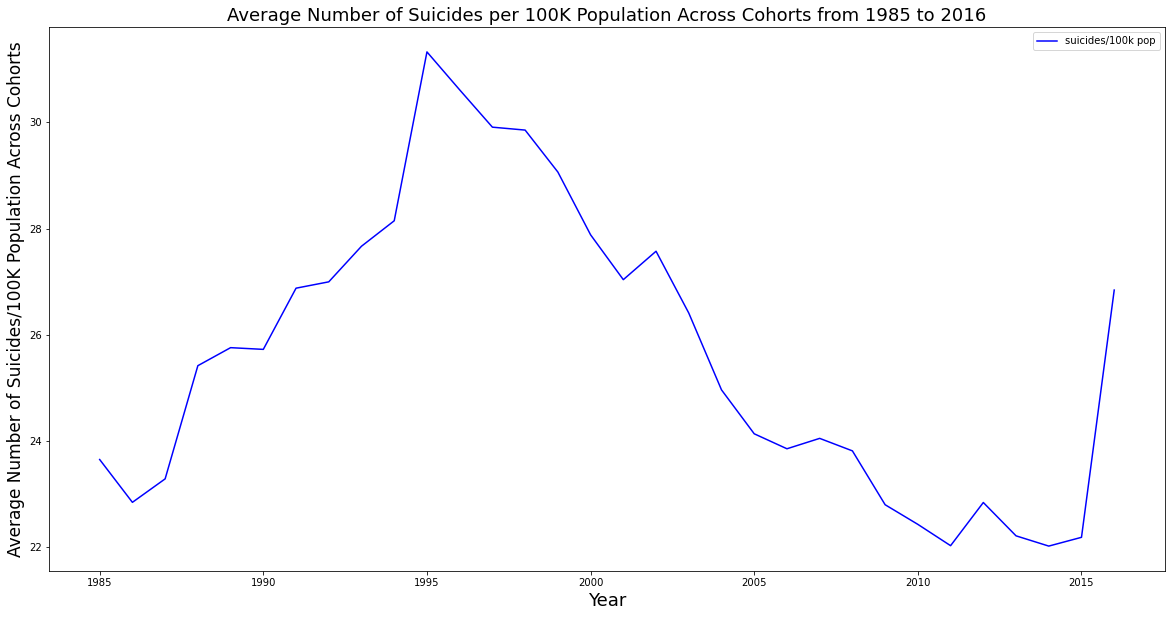

In [14]:
suicide_year.plot.line(color = "blue")

plt.title("Average Number of Suicides per 100K Population Across Cohorts from 1985 to 2016", fontdict = {'fontsize' : 18})
plt.xlabel("Year", fontdict = {'fontsize' : 18})
plt.ylabel("Average Number of Suicides/100K Population Across Cohorts", fontdict = {'fontsize' : 17})
plt.rcParams["figure.figsize"] = (20, 10)

In [9]:
#suicide/100K pop by country for 1995

suicide1995 = tsr[tsr["year"] == 1995]
suicide1995[["country", "suicides/100k pop"]].groupby("country").agg("mean").sort_values(by=["suicides/100k pop"])

,suicides/100k pop
country,
Antigua and Barbuda,0.000000
Qatar,0.000000
Bahamas,1.193333
Kuwait,2.123333
Azerbaijan,2.380000
...,...
Hungary,82.236667
Estonia,90.531667
Latvia,90.936667


In [10]:
#suicide/100K pop by country for 1996

suicide1995 = tsr[tsr["year"] == 1996]
suicide1995[["country", "suicides/100k pop"]].groupby("country").agg("mean").sort_values(by=["suicides/100k pop"])

,suicides/100k pop
country,
South Africa,1.338333
Bahamas,1.636667
Grenada,1.993333
Azerbaijan,2.971667
Kuwait,3.055000
...,...
Hungary,80.456667
Latvia,82.001667
Russian Federation,87.713333


In [11]:
#suicide/100K pop by country for 2000

suicide1995 = tsr[tsr["year"] == 2000]
suicide1995[["country", "suicides/100k pop"]].groupby("country").agg("mean").sort_values(by=["suicides/100k pop"])

,suicides/100k pop
country,
Kiribati,0.000000
Montenegro,0.000000
Maldives,0.000000
Jamaica,0.193333
Cyprus,1.393333
...,...
Belarus,74.550000
Latvia,75.533333
Hungary,77.426667


In [ ]:
## Year 1995 was peak number of suicide/100k pop
    ## Lithuania, Latvia, and Estonia in top 4 countries with highest number of suicide/100k pop
    ## Decrease in number of suicide/100k pop for each of the aforementioned countries after 1995

In [ ]:
## FIGURE 2
    ## Multiple line graph
    ## Average Number of Suicide per 100K Population by Generation from 1985 to 2010

In [15]:
## G.I. GEN

GIGEN = tsr[(tsr["generation"] == "G.I. Generation") & (tsr["year"] < 2001)]
xGIGEN = GIGEN[["suicides/100k pop", "year"]].groupby("year").agg("mean")

In [16]:
## SILENT

SILENT = tsr[(tsr["generation"] == "Silent") & (tsr["year"] < 2001)]
xSILENT = SILENT[["suicides/100k pop", "year"]].groupby("year").agg("mean")

In [17]:
## BOOMERS

BOOMERS = tsr[(tsr["generation"] == "Boomers") & (tsr["year"] < 2001)]
xBOOMERS = BOOMERS[["suicides/100k pop", "year"]].groupby("year").agg("mean")

In [18]:
## GEN X

GENX = tsr[(tsr["generation"] == "Generation X") & (tsr["year"] < 2001)]
xGENX = GENX[["suicides/100k pop", "year"]].groupby("year").agg("mean")

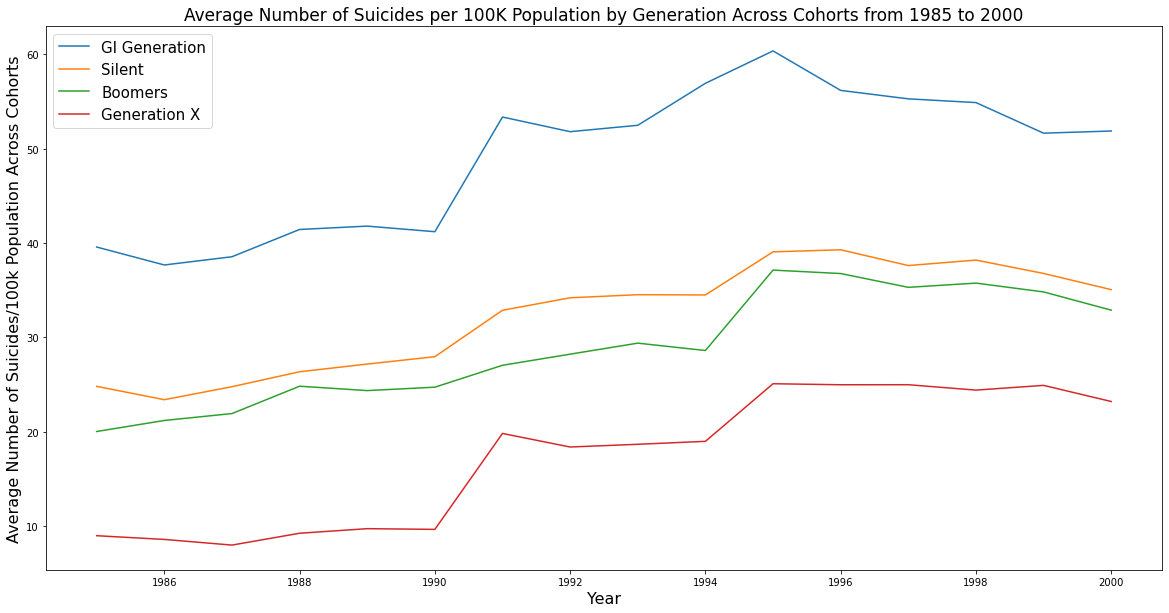

In [19]:
yGIGEN = xGIGEN["suicides/100k pop"]
ySILENT = xSILENT["suicides/100k pop"]
yBOOMERS = xBOOMERS["suicides/100k pop"]
yGENX = xGENX["suicides/100k pop"]
xYEAR = [1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000]

plt.plot(xYEAR, yGIGEN, label = "GI Generation")
plt.plot(xYEAR, ySILENT, label = "Silent")
plt.plot(xYEAR, yBOOMERS, label = "Boomers")
plt.plot(xYEAR, yGENX, label = "Generation X")

plt.title("Average Number of Suicides per 100K Population by Generation Across Cohorts from 1985 to 2000", fontdict = {'fontsize' : 17})
plt.ylabel("Average Number of Suicides/100k Population Across Cohorts",fontdict = {'fontsize' : 16})
plt.xlabel("Year", fontdict = {'fontsize' : 16})
plt.legend(prop={'size': 15})
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

In [20]:
# FIGURE 3
    ## Box plot
    ## Number of Suicide per 100K Population by Generation from 1985 to 2010

In [23]:
bp95to00 = tsr[(tsr["year"] < 2001) & (tsr["generation"] != "Millenials")]

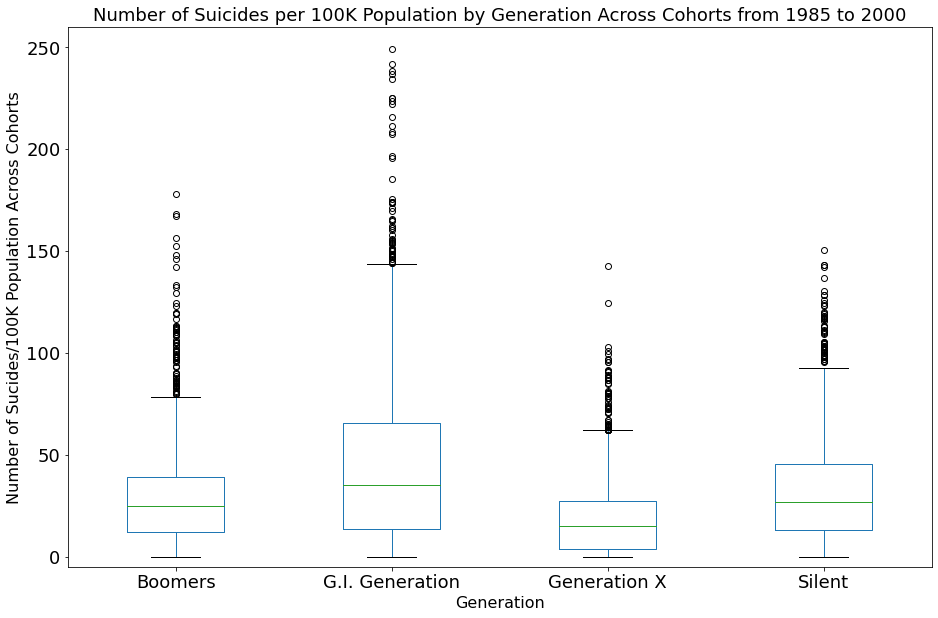

In [58]:
bp95to00.boxplot(by = "generation", column = ["suicides/100k pop"], grid = False)

plt.title("Number of Suicides per 100K Population by Generation Across Cohorts from 1985 to 2000", fontdict = {'fontsize' : 18})
plt.suptitle('')
plt.ylabel("Number of Sucides/100K Population Across Cohorts", fontdict = {'fontsize' : 16})
plt.xlabel("Generation", fontdict = {'fontsize' : 16})
plt.ylim(-5, 260)
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

In [24]:
## summary statistic of boxplot

bp95to00[["generation", "suicides/100k pop"]].groupby("generation").describe()

suicides/100k pop                                              \
                            count       mean        std  min      25%     50%   
generation                                                                      
Boomers                    1319.0  29.610061  25.451199  0.0  12.1300  24.680   
G.I. Generation            1372.0  47.892755  45.718880  0.0  13.7325  34.935   
Generation X               1852.0  18.491582  18.208385  0.0   3.8425  14.860   
Silent                     1057.0  33.221107  28.330889  0.0  13.1900  26.930   

                                 
                    75%     max  
generation                       
Boomers          38.895  177.98  
G.I. Generation  65.795  249.35  
Generation X     27.145  142.67  
Silent           45.270  150.53

In [172]:
# FIGURE 4
    ## Bar chart
    ## Average Number of Suicide per 100K Population by Gender from 1985 to 2016

In [25]:
## FEMALE Suicides/100k pop by Age

FEM = sro[sro["sex"] == "female"]
FEMbyAGE = FEM[["age", "suicides/100k pop"]].groupby("age").agg("mean").sort_values(by=["suicides/100k pop"])

In [26]:
## MALE Suicides/100k pop by Age

MAL = sro[sro["sex"] == "male"]
MALbyAGE = MAL[["age", "suicides/100k pop"]].groupby("age").agg("mean").sort_values(by=["suicides/100k pop"])

In [27]:
xYEARS = sro["age"].unique().tolist()
print(xYEARS)

['15-24 years', '35-54 years', '75+ years', '25-34 years', '55-74 years', '5-14 years']


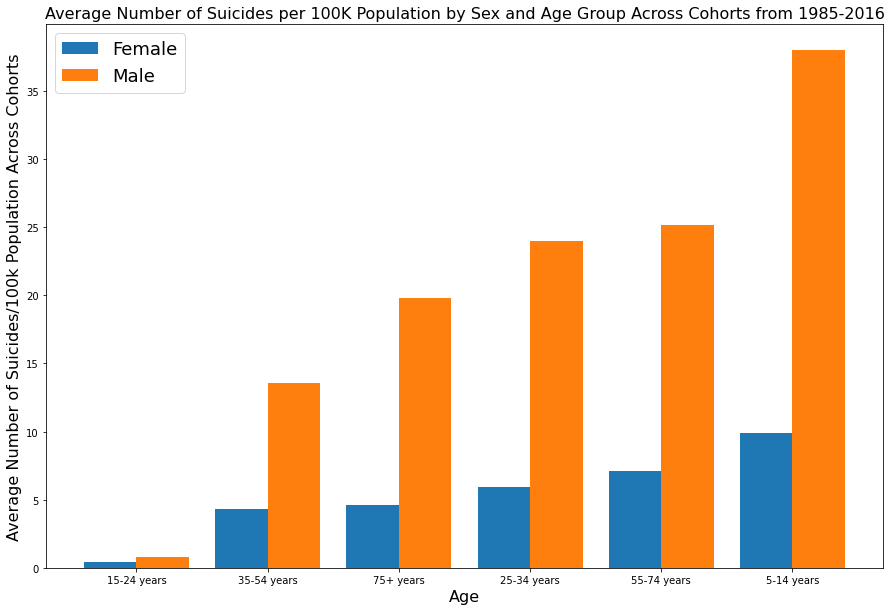

In [28]:
xFEM = FEMbyAGE["suicides/100k pop"]
xMAL = MALbyAGE["suicides/100k pop"]

x_axis = np.arange(len(xYEARS))

plt.bar(x_axis - 0.2, xFEM, 0.4, label = "Female")
plt.bar(x_axis + 0.2, xMAL, 0.4, label = 'Male')

plt.xticks(x_axis, xYEARS)
plt.title("Average Number of Suicides per 100K Population by Sex and Age Group Across Cohorts from 1985-2016", fontdict = {'fontsize' : 16})
plt.xlabel("Age", fontdict = {'fontsize' : 16})
plt.ylabel("Average Number of Suicides/100k Population Across Cohorts",fontdict = {'fontsize' : 16})
plt.legend(prop={'size': 18})
plt.rcParams.update({'font.size': 18})
plt.show()

In [29]:
## Average Number of Suicides/100K Population by Females and Age Groups Across Cohorts 

print(xFEM)

age
5-14 years     0.462252
15-24 years    4.328018
25-34 years    4.573210
35-54 years    5.916480
55-74 years    7.123447
75+ years      9.919802
Name: suicides/100k pop, dtype: float64


In [30]:
## Average Number of Suicides/100K Population by Males and Age Groups Across Cohorts 

print(xMAL)

age
5-14 years      0.777831
15-24 years    13.566290
25-34 years    19.800560
35-54 years    23.978402
55-74 years    25.187712
75+ years      37.991017
Name: suicides/100k pop, dtype: float64


In [31]:
# FIGURE 5
    ## Regression
    ## Generation

In [32]:
## Dummies for Generation

gendummies = pd.get_dummies(tsr["generation"])
gendummies.head()

,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [33]:
tsr[gendummies.columns] = gendummies
tsr.head()

,country,year,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,Antigua and Barbuda,1985,15-24 years,0,15376,0.00,Antigua and Barbuda1985,2.409239e+08,3850,Generation X,0,0,1,0,0,0
1,Argentina,1985,15-24 years,225,4769400,9.39,Argentina1985,8.841667e+10,3264,Generation X,0,0,1,0,0,0
2,Australia,1985,15-24 years,384,2659800,28.52,Australia1985,1.801910e+11,12374,Generation X,0,0,1,0,0,0
3,Austria,1985,15-24 years,257,1287320,39.55,Austria1985,6.938677e+10,9759,Generation X,0,0,1,0,0,0
4,Bahamas,1985,15-24 years,0,47200,0.00,Bahamas1985,2.320700e+09,11393,Generation X,0,0,1,0,0,0


In [34]:
pd.get_dummies(tsr["generation"], drop_first = True)

,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
13905,0,0,0,0,1
13906,0,0,0,0,1
13907,0,0,0,0,1
13908,0,0,0,0,1


In [35]:
X = tsr[["G.I. Generation", "Generation X", "Generation Z", "Millenials", "Silent"]]
Xfull = sm.add_constant(X)

Y = pd.DataFrame(tsr["suicides/100k pop"])

In [30]:
Xfull.head()

,const,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,1.0,0,1,0,0,0
1,1.0,0,1,0,0,0
2,1.0,0,1,0,0,0
3,1.0,0,1,0,0,0
4,1.0,0,1,0,0,0


In [36]:
Y.head()

,suicides/100k pop
0,0.00
1,9.39
2,28.52
3,39.55
4,0.00


In [37]:
sm.OLS(Y, Xfull).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     634.7
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        03:36:42   Log-Likelihood:                -65427.
No. Observations:               13910   AIC:                         1.309e+05
Df Residuals:                   13904   BIC:                         1.309e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              29.4842      0.535     55.147      0.000      28.436      30.532
G.I. Generation    18.4086      0.898     20.509      0.000      16.649      20.168
Generation X       -8.3704      0.713    -11.739      0.000      -9.768      -6.973
Generation Z      -28.1996      1.121    -25.160      0.000     -30.396     -26.003
Millenials        -18.7170      0.728    -25.712      0.000     -20.144     -17.290
Silent              7.3535      0.714     10.297      0.000       5.954       8.753
==============================================================================
Omnibus:                     5833.065   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37606.633
Skew:                           1.898   Prob(JB):                         0.00
Kurtosis:                      10.104   Cond. No.                         7.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# FIGURE 6
    ## Regression
    ## Generation and Age

In [39]:
## Dummies for Age

agedummies = pd.get_dummies(tsr["age"])
agedummies.head()

,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [40]:
tsr[agedummies.columns] = agedummies
tsr.head()

,country,year,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,...,Generation X,Generation Z,Millenials,Silent,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,Antigua and Barbuda,1985,15-24 years,0,15376,0.00,Antigua and Barbuda1985,2.409239e+08,3850,Generation X,...,1,0,0,0,1,0,0,0,0,0
1,Argentina,1985,15-24 years,225,4769400,9.39,Argentina1985,8.841667e+10,3264,Generation X,...,1,0,0,0,1,0,0,0,0,0
2,Australia,1985,15-24 years,384,2659800,28.52,Australia1985,1.801910e+11,12374,Generation X,...,1,0,0,0,1,0,0,0,0,0
3,Austria,1985,15-24 years,257,1287320,39.55,Austria1985,6.938677e+10,9759,Generation X,...,1,0,0,0,1,0,0,0,0,0
4,Bahamas,1985,15-24 years,0,47200,0.00,Bahamas1985,2.320700e+09,11393,Generation X,...,1,0,0,0,1,0,0,0,0,0


In [41]:
pd.get_dummies(tsr["age"], drop_first = True)

,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
13905,0,0,0,0,1
13906,0,0,0,0,1
13907,0,0,0,0,1
13908,0,0,0,0,1


In [46]:
X1 = tsr[["G.I. Generation", "Generation X", "Generation Z", "Millenials", "Silent", "25-34 years", "35-54 years", "5-14 years", "55-74 years", "75+ years"]]
X1full = sm.add_constant(X1)

Y1 = pd.DataFrame(tsr["suicides/100k pop"])

In [43]:
X1full.head()

,const,G.I. Generation,Generation X,Generation Z,Millenials,Silent,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,1.0,0,1,0,0,0,0,0,0,0,0
1,1.0,0,1,0,0,0,0,0,0,0,0
2,1.0,0,1,0,0,0,0,0,0,0,0
3,1.0,0,1,0,0,0,0,0,0,0,0
4,1.0,0,1,0,0,0,0,0,0,0,0


In [44]:
Y1.head()

,suicides/100k pop
0,0.00
1,9.39
2,28.52
3,39.55
4,0.00


In [45]:
sm.OLS(Y1, X1full).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     424.1
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        03:37:07   Log-Likelihood:                -65005.
No. Observations:               13910   AIC:                         1.300e+05
Df Residuals:                   13899   BIC:                         1.301e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.6164      1.104     18.676      0.000      18.453      22.780
G.I. Generation     5.6300      1.333      4.223      0.000       3.017       8.243
Generation X       -1.6206      0.913     -1.774      0.076      -3.411       0.170
Generation Z       -3.1720      1.560     -2.033      0.042      -6.230      -0.114
Millenials         -3.6432      1.129     -3.226      0.001      -5.857      -1.430
Silent             -0.1457      1.061     -0.137      0.891      -2.226       1.934
25-34 years         5.3263      0.835      6.378      0.000       3.689       6.963
35-54 years         9.6411      1.100      8.761      0.000       7.484      11.798
5-14 years        -16.1598      0.869    -18.599      0.000     -17.863     -14.457
55-74 years        11.0313      1.460      7.556      0.000       8.170      13.893
75+ years          24.8098      1.601     15.500      0.000      21.672      27.947
==============================================================================
Omnibus:                     5609.572   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37207.155
Skew:                           1.800   Prob(JB):                         0.00
Kurtosis:                      10.158   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""